# Model SIR

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

**Cel: zredukowanie modelu równań różniczkowych**


$$ \begin{array}{rcl} \displaystyle \frac{dS}{dt} & = & \displaystyle -\frac{\beta}{N} I S \\ \displaystyle \frac{dI}{dt} & = & \displaystyle \frac{\beta}{N} I S - \gamma I \\ \displaystyle \frac{dR}{dt} & = & \gamma I \end{array} \quad, $$
gdzie: <br> <br>
$ N = S + I + R$  <br>
$S$ - ilość (gęstość) podatnych (ang. _susceptible_), <br>
$I$ - ilość (gęstość) zainfekowanych, którzy przenoszą chorobę (ang. _infected_ i _infectious_), <br>
$R$ - ilość (gęstość) ozdrowiałych lub usuniętych z populacji z powodu śmierci na skutek infekcji (ang. _recovered_ lub _removed_), <br>
$\beta > 0$ - parametr określający tempo rozprzestrzeniania się infekcji (ang. _transmission rate_), <br>
$\gamma$ - parametr określający tempo zdrowienia (ang. _recovery rate_), <br> 
$\quad$     średni czas przebywania w grupie $I$ to $1/\gamma$ .<br>

**Nasze wartości początkowe**

In [108]:
T = 200
h = 1e-2
t = np.arange(start=0, stop=T + h, step=h)

bet, gam = 0.15, 1 / 50
# S_start = 0.8 
S_start = np.random.uniform(0.7, 1)
I_start = 1 - S_start
R_start = 0
N = S_start + I_start + R_start  # is const

## 1) Zredukowanie modelu do dwóch równań różniczkowych 

### a) Wyprowadzenie wzorów:

<br>**Najpierw udowodnijmy, że dla najprostszego modelu SIR całkowita populacja (N) jest stała:**

$ N = S + I + R$ <br>
Narzucając obustronnie pochodną po t: <br><br>
$
\begin{align}
\frac{dN}{dt} = \frac{dS}{dt} + \frac{dI}{dt} + \frac{dR}{dt}
\end{align}
$

wiedząc że:
<br><br>
$
\begin{align}
\frac{dS}{dt}=-\frac{\beta}{N} I S
\end{align}
$
<br><br>
$
\begin{align}
\frac{dI}{dt}=\frac{\beta}{N} I S - \gamma I 
\end{align}
$
<br><br>
$
\frac{dR}{dt}=\gamma I
$
<br><br>
Otrzymujemy: <br><br>
$
\begin{align}
\frac{dN}{dt} = -\frac{\beta}{N} I S + \frac{\beta}{N} I S - \gamma I + \gamma I = 0
\end{align}
$
<br><br> Co dowodzi że N jest stałe

<br> **Ponieważ całkowita populacja jest stała, trzecie równanie może być uzyskane z pierwszych dwóch:**
<br><br>
$ N = S + I + R$ <br>
$ R = N - S - I$ <br>
<br> Z tego powodu wystarczy że wyliczymy z równań różniczkowych tylko S oraz I, a R będziemy mogli uzyskać z już wyliczonych S, I

### b) Implementacji i zamodelowanie:

**Używając "solwera" *odeint* z biblioteki *scipy.integrate*:**

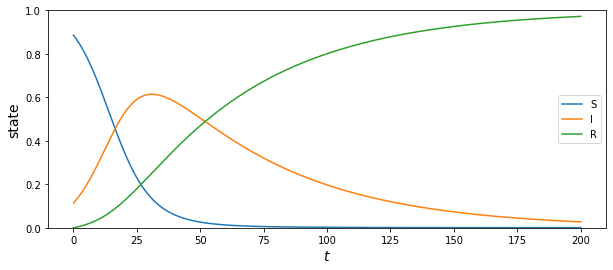

In [109]:
def two_diff_ode_equation(state, t, bet, gam):
    S, I = state
    return [- bet * I * S / N, bet * I * S / N - gam * I]

def calc_R(S_arr, I_arr):
    R_arr = np.zeros(len(t))
    for i in range(len(R_arr)):
        R_arr[i] = N - S_arr[i] - I_arr[i]
    return R_arr

def two_equation_ode_plot(t, sym, labelt='$t$', labels=['S', 'I', 'R']):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))

    # plot drawing (S, I)
    for i in range(len(labels) - 1):
        ax.plot(t, sym[:, i], label=labels[i])
    # plot drawing (R)
    ax.plot(t, calc_R(sym[:, 0], sym[:, 1]), label=labels[2])

    ax.set_xlabel(labelt, fontsize=14)
    ax.set_ylabel('state', fontsize=14)
    ax.set_ylim([0, 1])
    ax.legend()
    plt.show()

# ---------------------------------------------------------------------------------------------------------------#
start_state = S_start, I_start
sym = odeint(two_diff_ode_equation, start_state, t, args=(bet, gam))
two_equation_ode_plot(t, sym, labels=['S', 'I', 'R'])

**Ręcznie zapisując funkcję według schematu Eulera:**

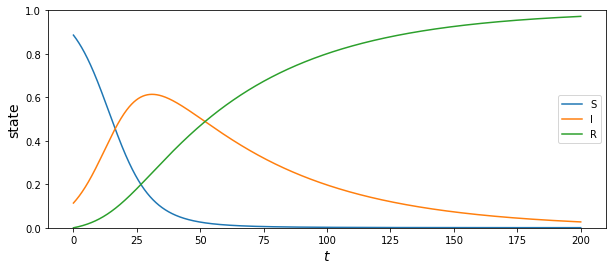

In [110]:
S = np.zeros(len(t))
S[0] = S_start
I = np.zeros(len(t))
I[0] = I_start
R = np.zeros(len(t))
R[0] = R_start


def two_diff_equation_manual():
    for i in range(t.size - 1):
        S[i + 1] = S[i] + h * (- bet * I[i] * S[i] / N)
        I[i + 1] = I[i] + h * (bet * I[i] * S[i + 1] / N - gam * I[i])
        R[i + 1] = N - S[i + 1] - I[i + 1]

def equation_man_plot(t, sirList, labelt='$t$', labels=['S', 'I', 'R']):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
    # plot drawing (R, S, I)
    for i in range(len(sirList)):
        ax.plot(t, sirList[i], label=labels[i])
    ax.set_xlabel(labelt, fontsize=14)
    ax.set_ylabel('state', fontsize=14)
    ax.set_ylim([0, 1])
    ax.legend()
    plt.show()

# ---------------------------------------------------------------------------------------------------------------#
two_diff_equation_manual()
equation_man_plot(t, [S, I, R], labels=['S', 'I', 'R'])

### 2) Zredukowanie modelu do jednego równania różniczkowego

### a) Wyprowadzenie wzorów:

Przez chwilę postrzegamy I jako funkcję od S i obliczamy: $\frac{dI}{dS}$ <br><br>
$
\begin{align}
\frac{dI}{dS} = \frac{\frac{dI}{dt}}{\frac{dS}{dt}} = \frac{\beta I S-\gamma I}{-\beta I S} = \frac{\gamma}{\beta S} - 1
\end{align}
$
<br>Zauważamy następnie, że zależy tylko od S. Wiedząc że całkowanie jest operacją odwrotną do różniczkowania wyliczamy: <br><br>
$
\begin{align}
I = \frac{\gamma}{\beta}*ln(S)-S+C
\end{align}
$ <br> gdzie  C - const <br><br> Możemy je wyliczyć dla wartości początkowych: <br><br>
$
\begin{align}
C = I(0) - \frac{\gamma}{\beta}*ln(S(0)) + S(0)
\end{align}
$
<br><br> Tym sposobem jesteśmy zależni tylko od S, a I oraz R możemy wyliczyć posiadając tylko S

### b) Implemntacja i zamodelowanie:

**Używając "solwera" *odeint* z biblioteki *scipy.integrate*:**

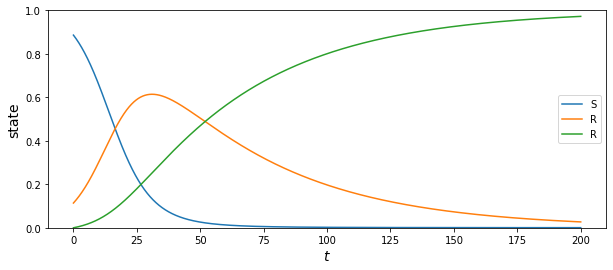

In [113]:
C = I_start - gam / bet * np.log(S_start) + S_start  # C - const

def one_diff_equation_ode(state, t, bet, gam):
    S = state[0]
    return [(-bet / N * S * (gam / bet * np.log(S) - S + C))]


def calc_R(S_arr, I_arr):
    R_arr = np.zeros(len(t))
    for i in range(len(R_arr)):
        R_arr[i] = N - S_arr[i] - I_arr[i]
    return R_arr


def calc_I(S_arr):
    I_arr = np.zeros(len(t))
    for i in range(len(I_arr)):
        I_arr[i] = gam / bet * np.log(S_arr[i]) - S_arr[i] + C
    return I_arr

def one_equation_ode_plot(t, sym, labelt='$t$', labels=['S', 'I', 'R']):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))

    # plot drawing (S)
    ax.plot(t, sym[:, 0], label=labels[0])
    # plot drawing (I)
    I_arr = calc_I(sym[:, 0])
    ax.plot(t, I_arr, label=labels[2])
    # plot drawing (R)
    ax.plot(t, calc_R(sym[:, 0], I_arr), label=labels[2])

    ax.set_xlabel(labelt, fontsize=14)
    ax.set_ylabel('state', fontsize=14)
    ax.set_ylim([0, 1])
    ax.legend()
    plt.show()


start_state = S_start
sym = odeint(one_diff_equation_ode, start_state, t, args=(bet, gam))
one_equation_ode_plot(t, sym, labels=['S', 'I', 'R'])

**Ręcznie zapisując funkcję według schematu Eulera**

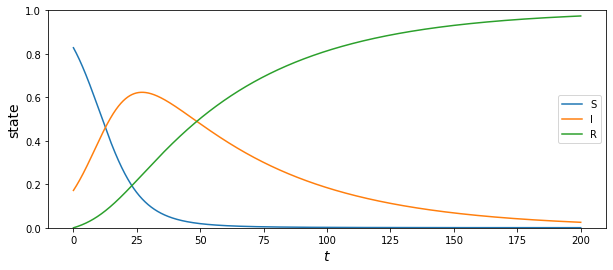

In [103]:
S = np.zeros(len(t))
S[0] = S_start
I = np.zeros(len(t))
I[0] = I_start
R = np.zeros(len(t))
R[0] = R_start


def one_diff_equation_manual():
    C = I_start - gam / bet * np.log(S_start) + S_start  # C - const
    for i in range(t.size - 1):
        S[i + 1] = S[i] + h * (-bet / N * S[i] * (gam / bet * np.log(S[i]) - S[i] + C))
        I[i + 1] = gam / bet * np.log(S[i + 1]) - S[i + 1] + C
        R[i + 1] = N - S[i + 1] - I[i + 1]


def equation_man_plot(t, sirList, labelt='$t$', labels=['S', 'I', 'R']):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
    # plot drawing (R, S, I)
    for i in range(len(sirList)):
        ax.plot(t, sirList[i], label=labels[i])
    ax.set_xlabel(labelt, fontsize=14)
    ax.set_ylabel('state', fontsize=14)
    ax.set_ylim([0, 1])
    ax.legend()
    plt.show()

# ---------------------------------------------------------------------------------------------------------------#
one_diff_equation_manual()
equation_man_plot(t, [S, I, R], labels=['S', 'I', 'R'])

Autor: Łukasz Gajerski, 246703